In [289]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

sns.set(font_scale=1.5, style = 'whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [275]:
df = pd.read_csv("df_final.csv")
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

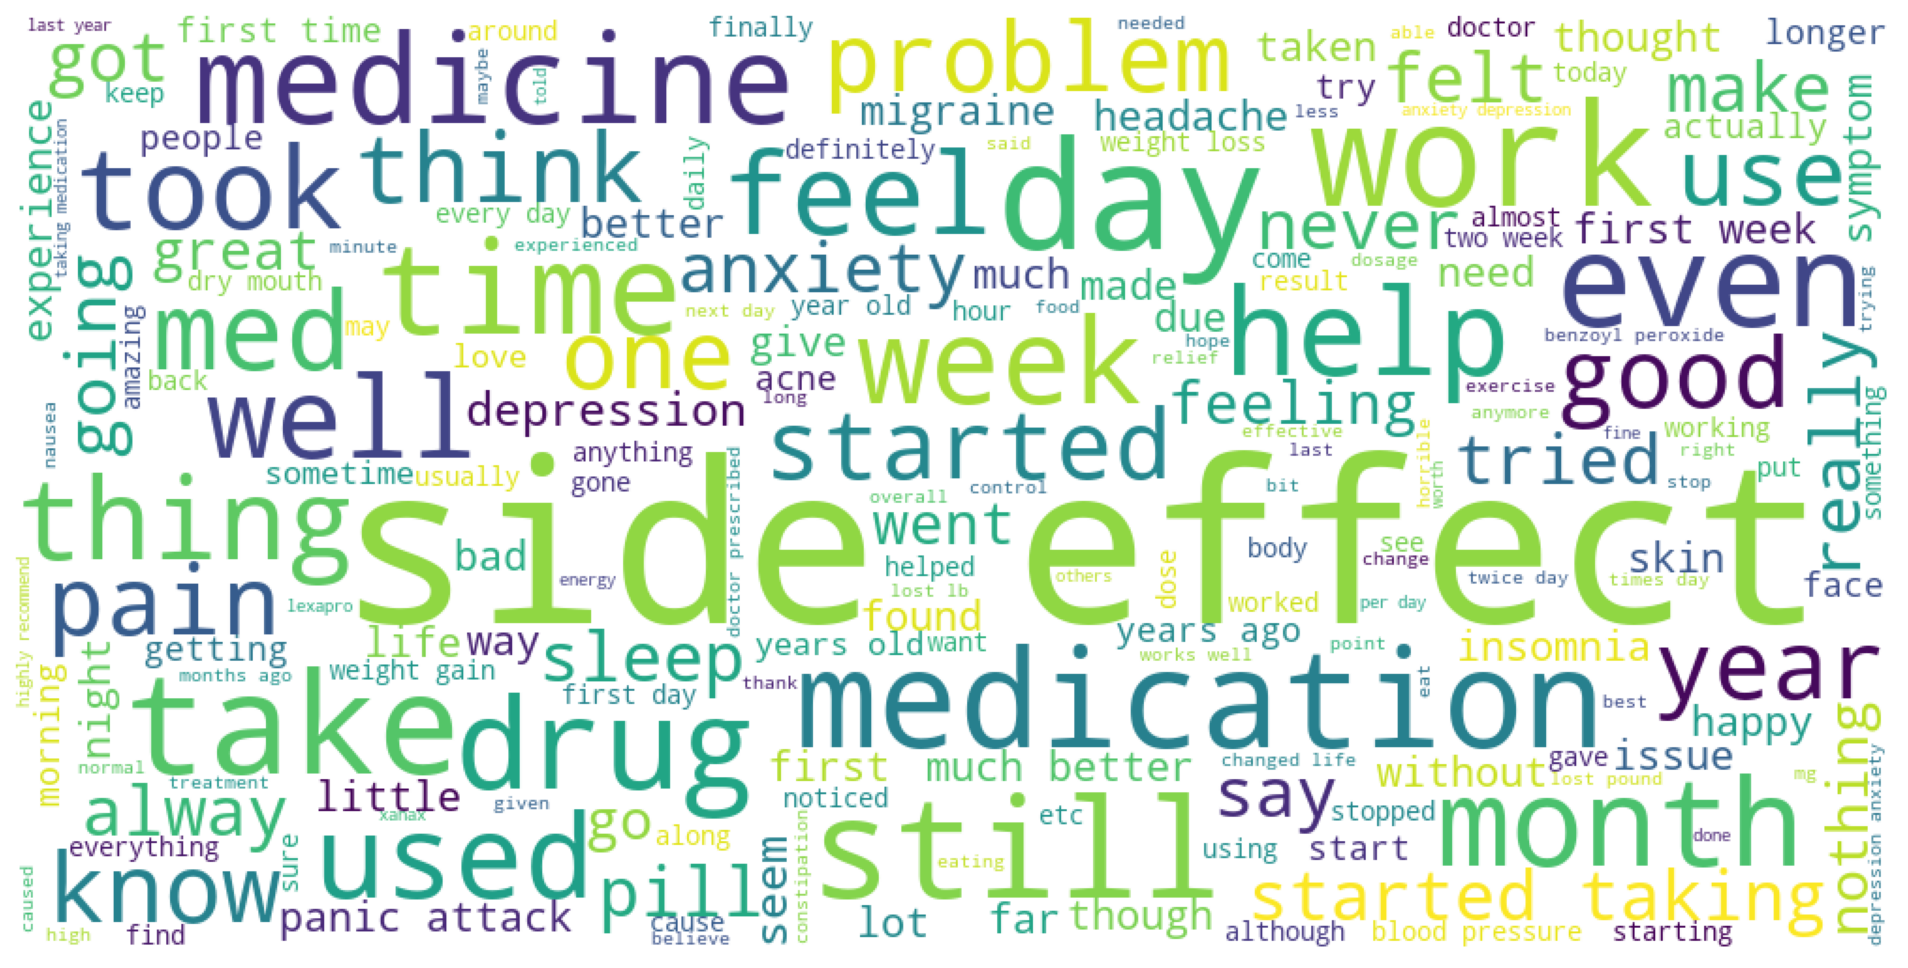

In [276]:
df_rate_one = df.loc[df.Rating_Binary == 1, 'review_clean']
k = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

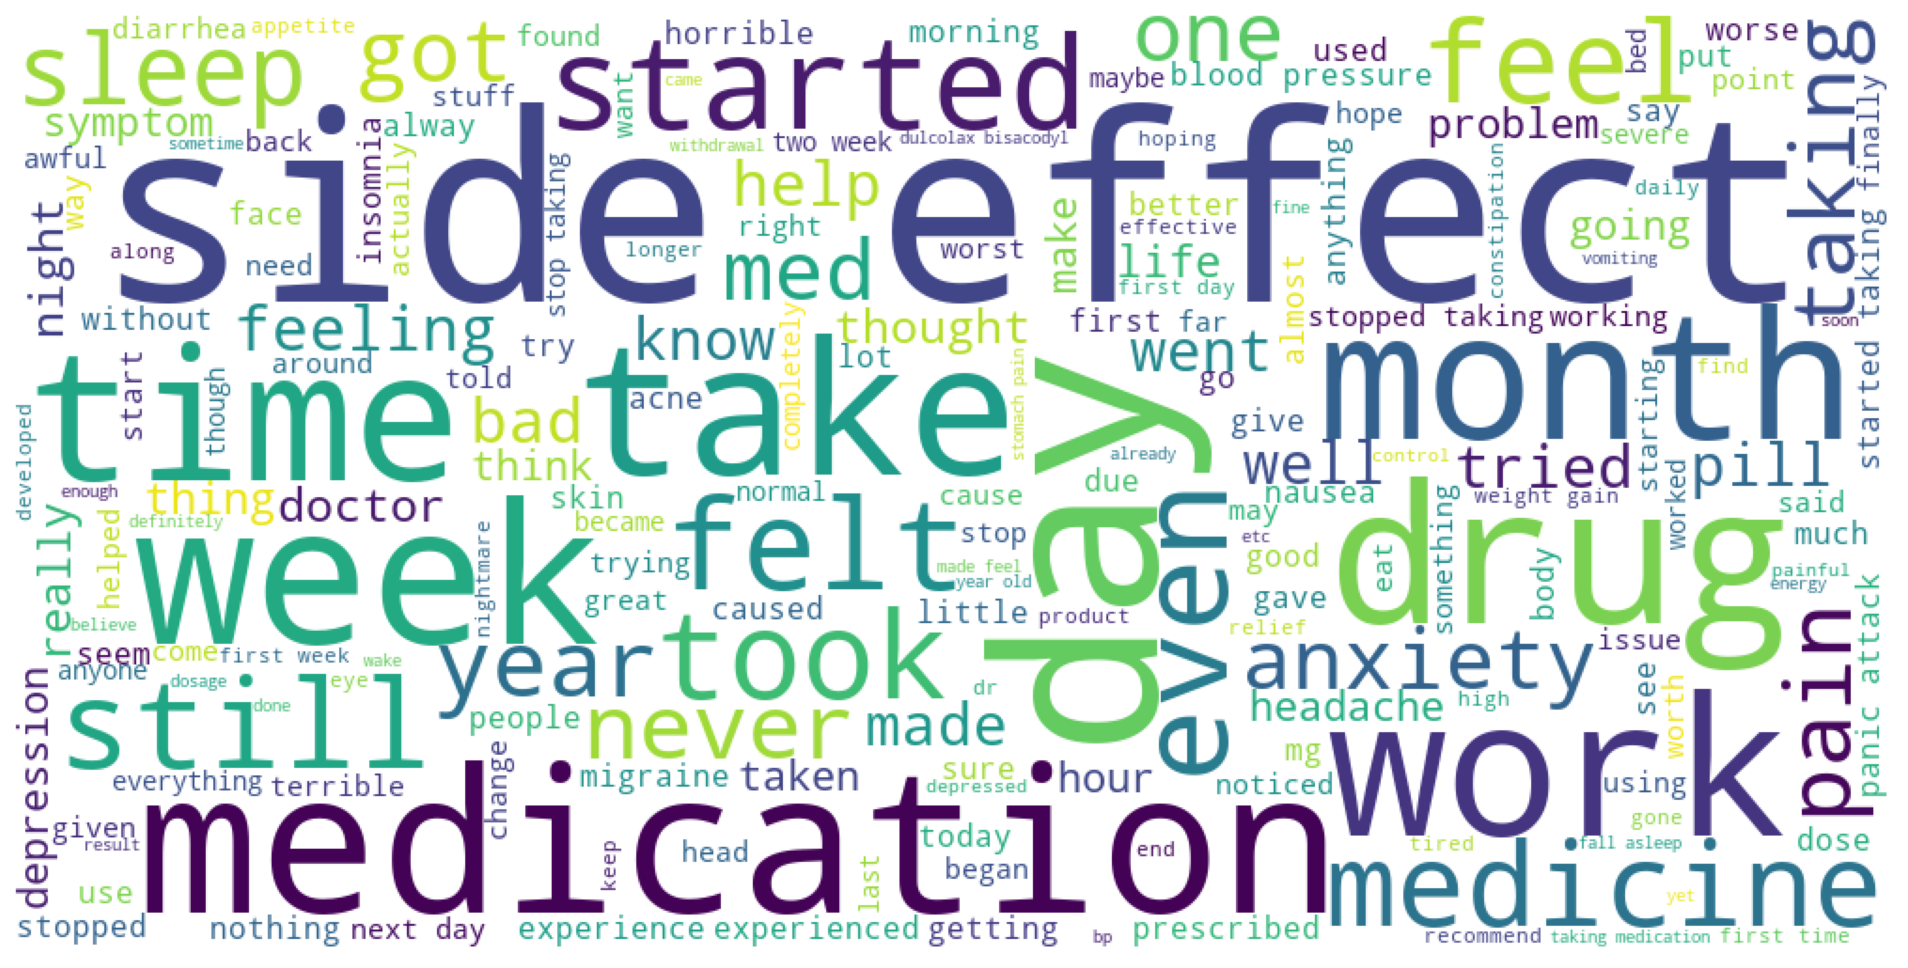

In [277]:
df_rate_zero = df.loc[df.Rating_Binary == 0, 'review_clean']
k = (' '.join(df_rate_zero))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

In [279]:
df_ngrams = df[['Rating', 'review_clean']]

df_review_0 = " ".join(df_ngrams.loc[df_ngrams.Rating <= 5, 'review_clean'])
df_review_1 = " ".join(df_ngrams.loc[df_ngrams.Rating > 5, 'review_clean'])

token_review_0 = word_tokenize(df_review_0)
token_review_1 = word_tokenize(df_review_1)

Text(0.5, 1.0, 'Bigram')

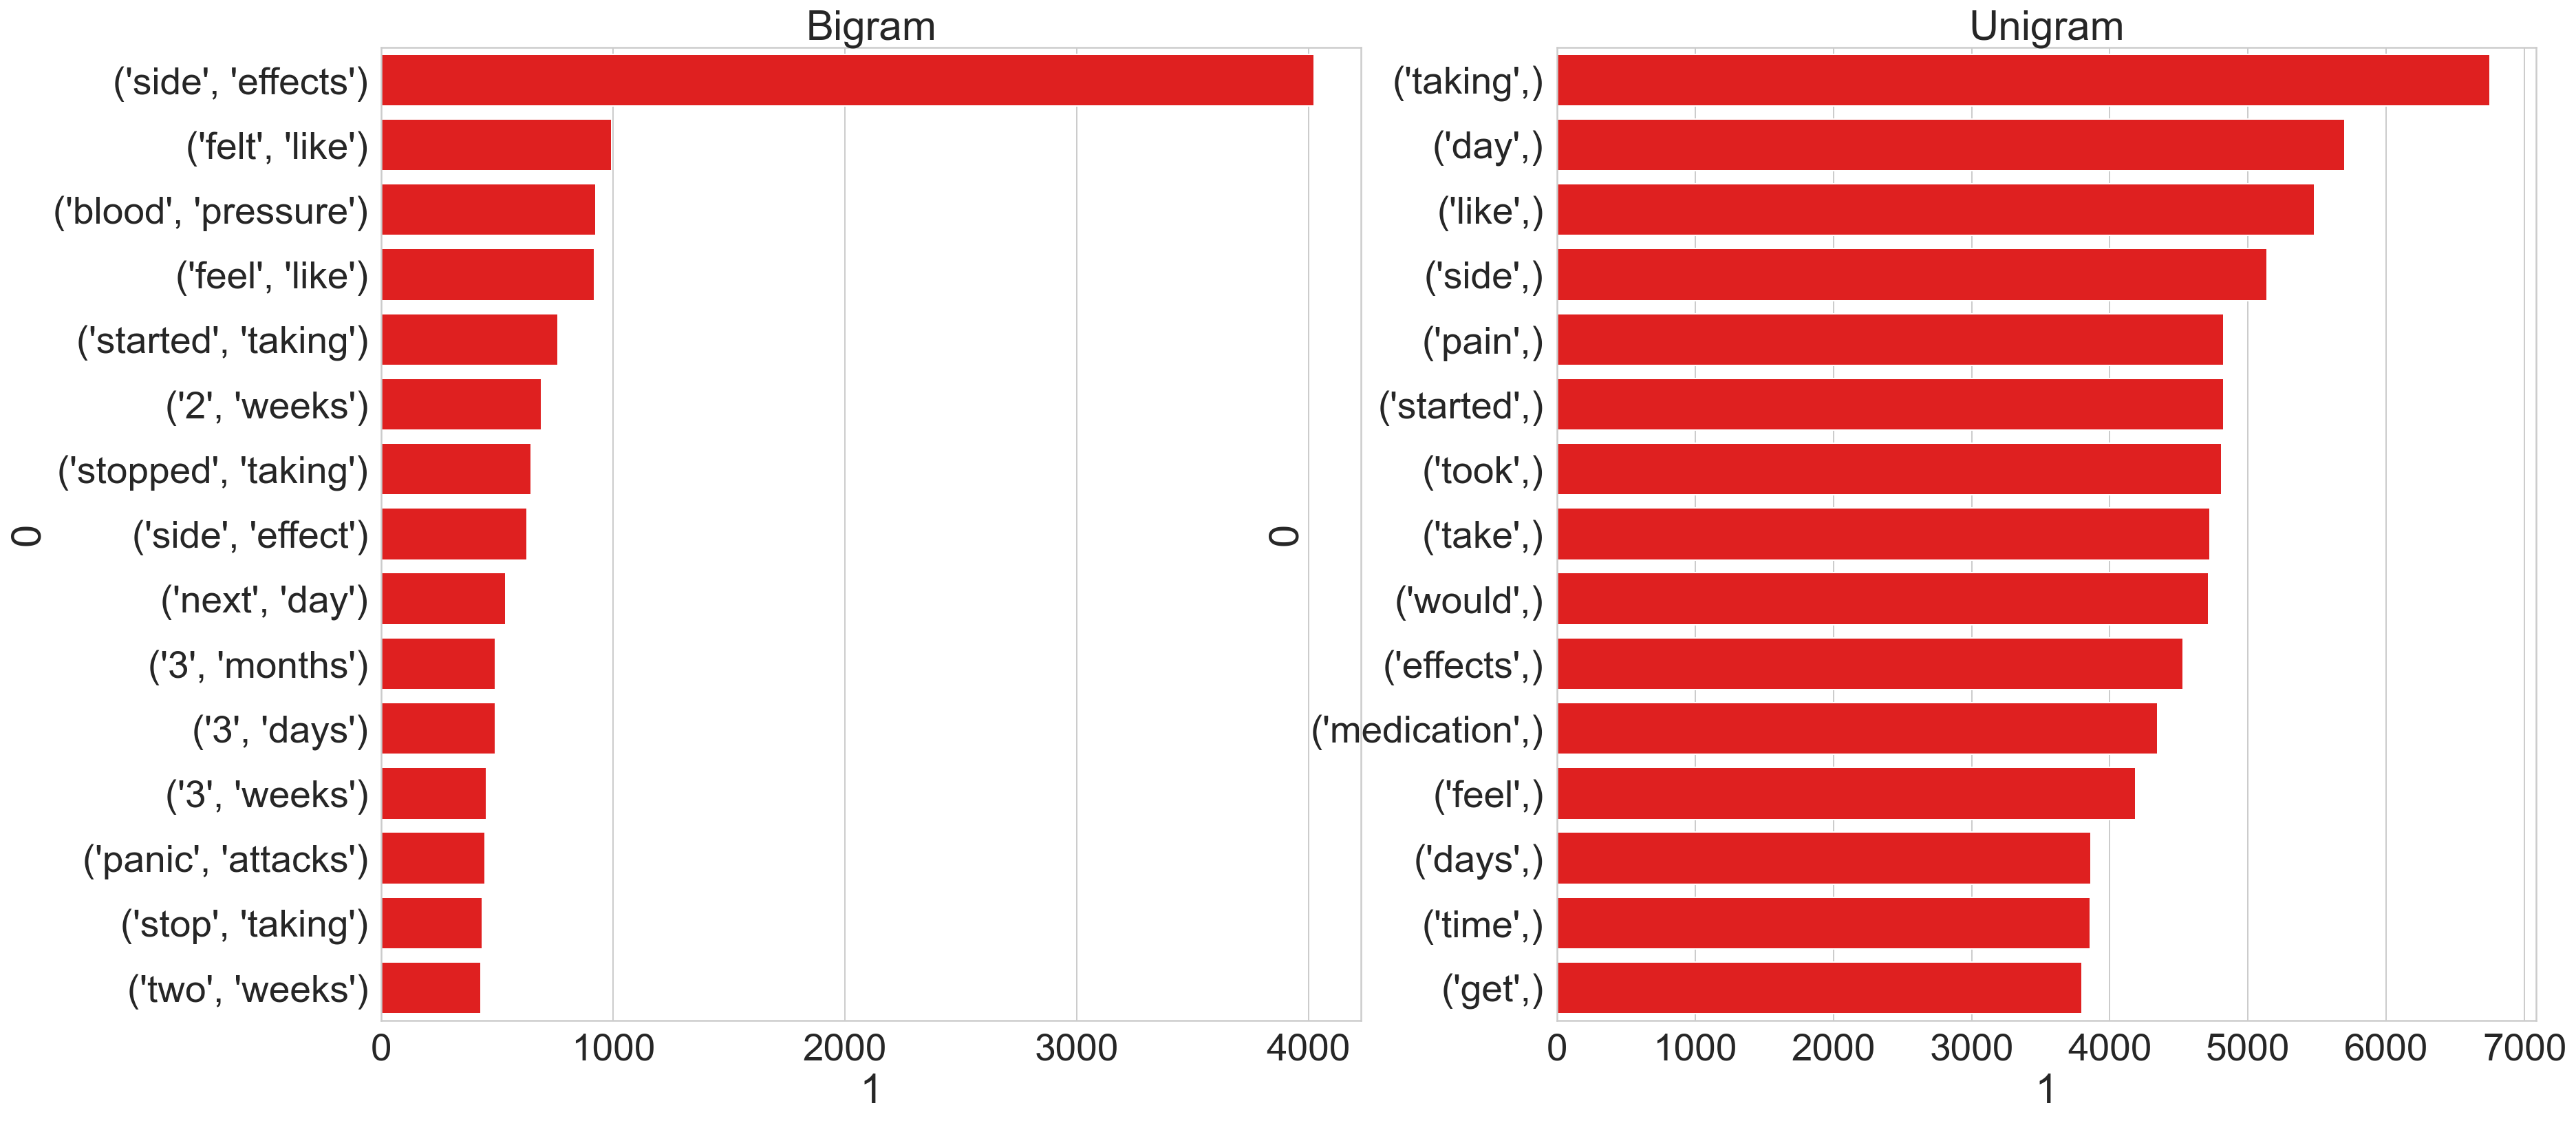

In [285]:
unigrams_0 = ngrams(token_review_0, 1)
bigrams_0 = ngrams(token_review_0, 2)

frequency_u0 = Counter(unigrams_0)
frequency_b0 = Counter(bigrams_0)

df_u0 = pd.DataFrame(frequency_u0.most_common(15))
df_b0 = pd.DataFrame(frequency_b0.most_common(15))

plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)

sns_b0 = sns.barplot(x = df_b0[1], y = df_b0[0], color = 'red', ax = ax[0])
sns_u0 = sns.barplot(x = df_u0[1], y = df_u0[0], color = 'red', ax = ax[1])


# Setting axes labels
sns_u0.set_title("Unigram")
sns_b0.set_title("Bigram")

Text(0.5, 1.0, 'Bigram')

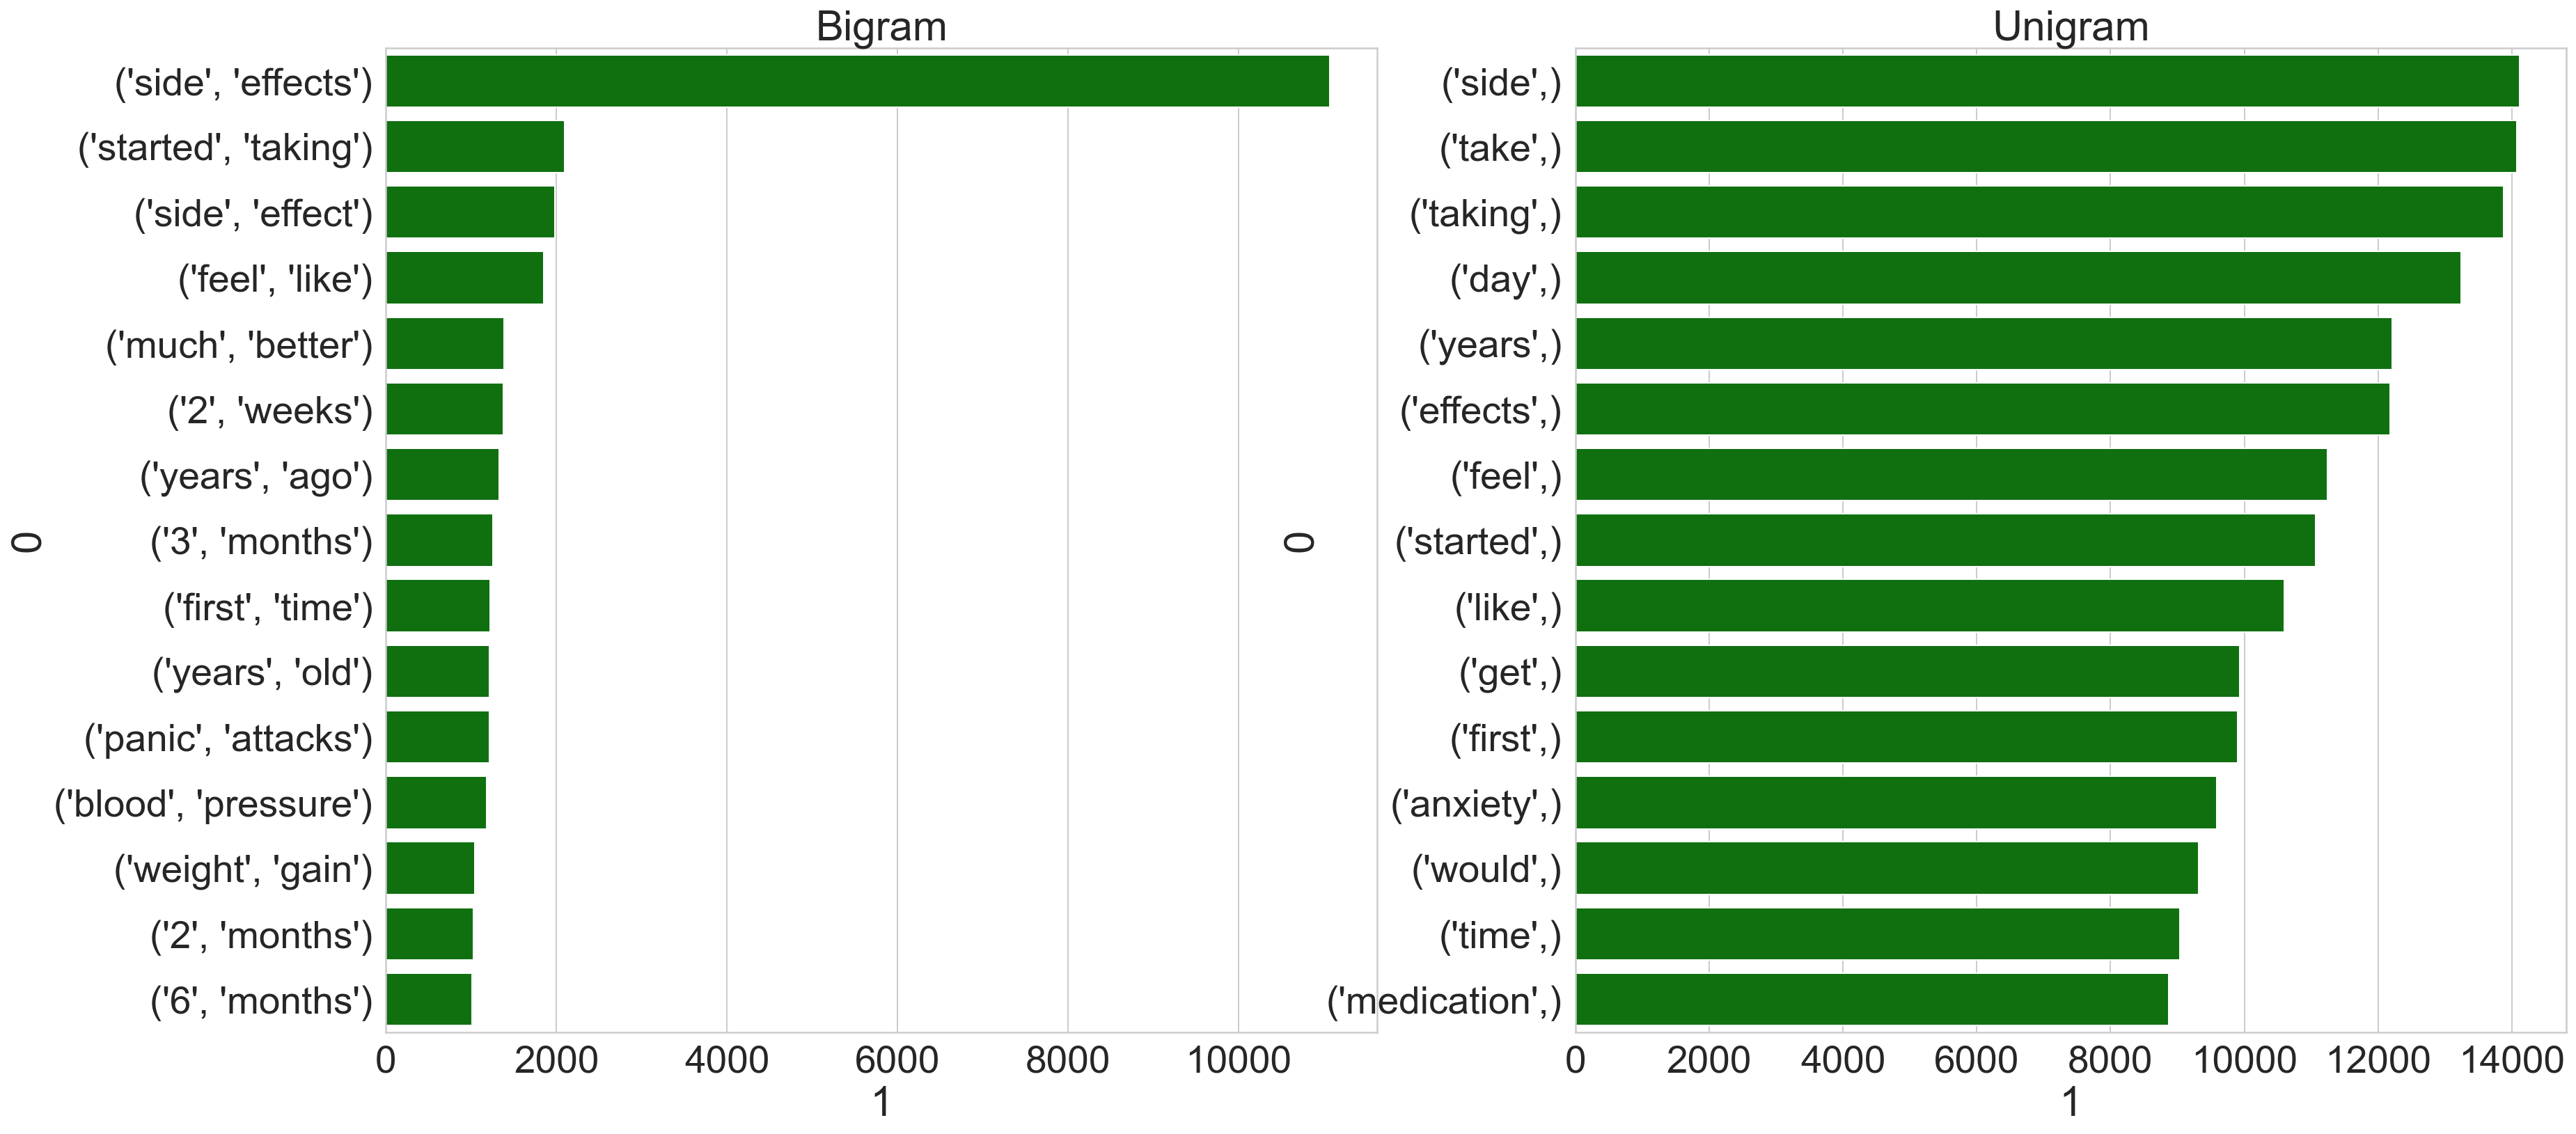

In [287]:
unigrams_1 = ngrams(token_review_1, 1)
bigrams_1 = ngrams(token_review_1, 2)

frequency_u1 = Counter(unigrams_1)
frequency_b1 = Counter(bigrams_1)

df_u1 = pd.DataFrame(frequency_u1.most_common(15))
df_b1 = pd.DataFrame(frequency_b1.most_common(15))

plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)

sns_b1 = sns.barplot(x = df_b1[1], y = df_b1[0], color = 'green', ax = ax[0])
sns_u1 = sns.barplot(x = df_u1[1], y = df_u1[0], color = 'green', ax = ax[1])

sns_u1.set_title("Unigram")
sns_b1.set_title("Bigram")

Text(0.5, 1.0, 'Positive')

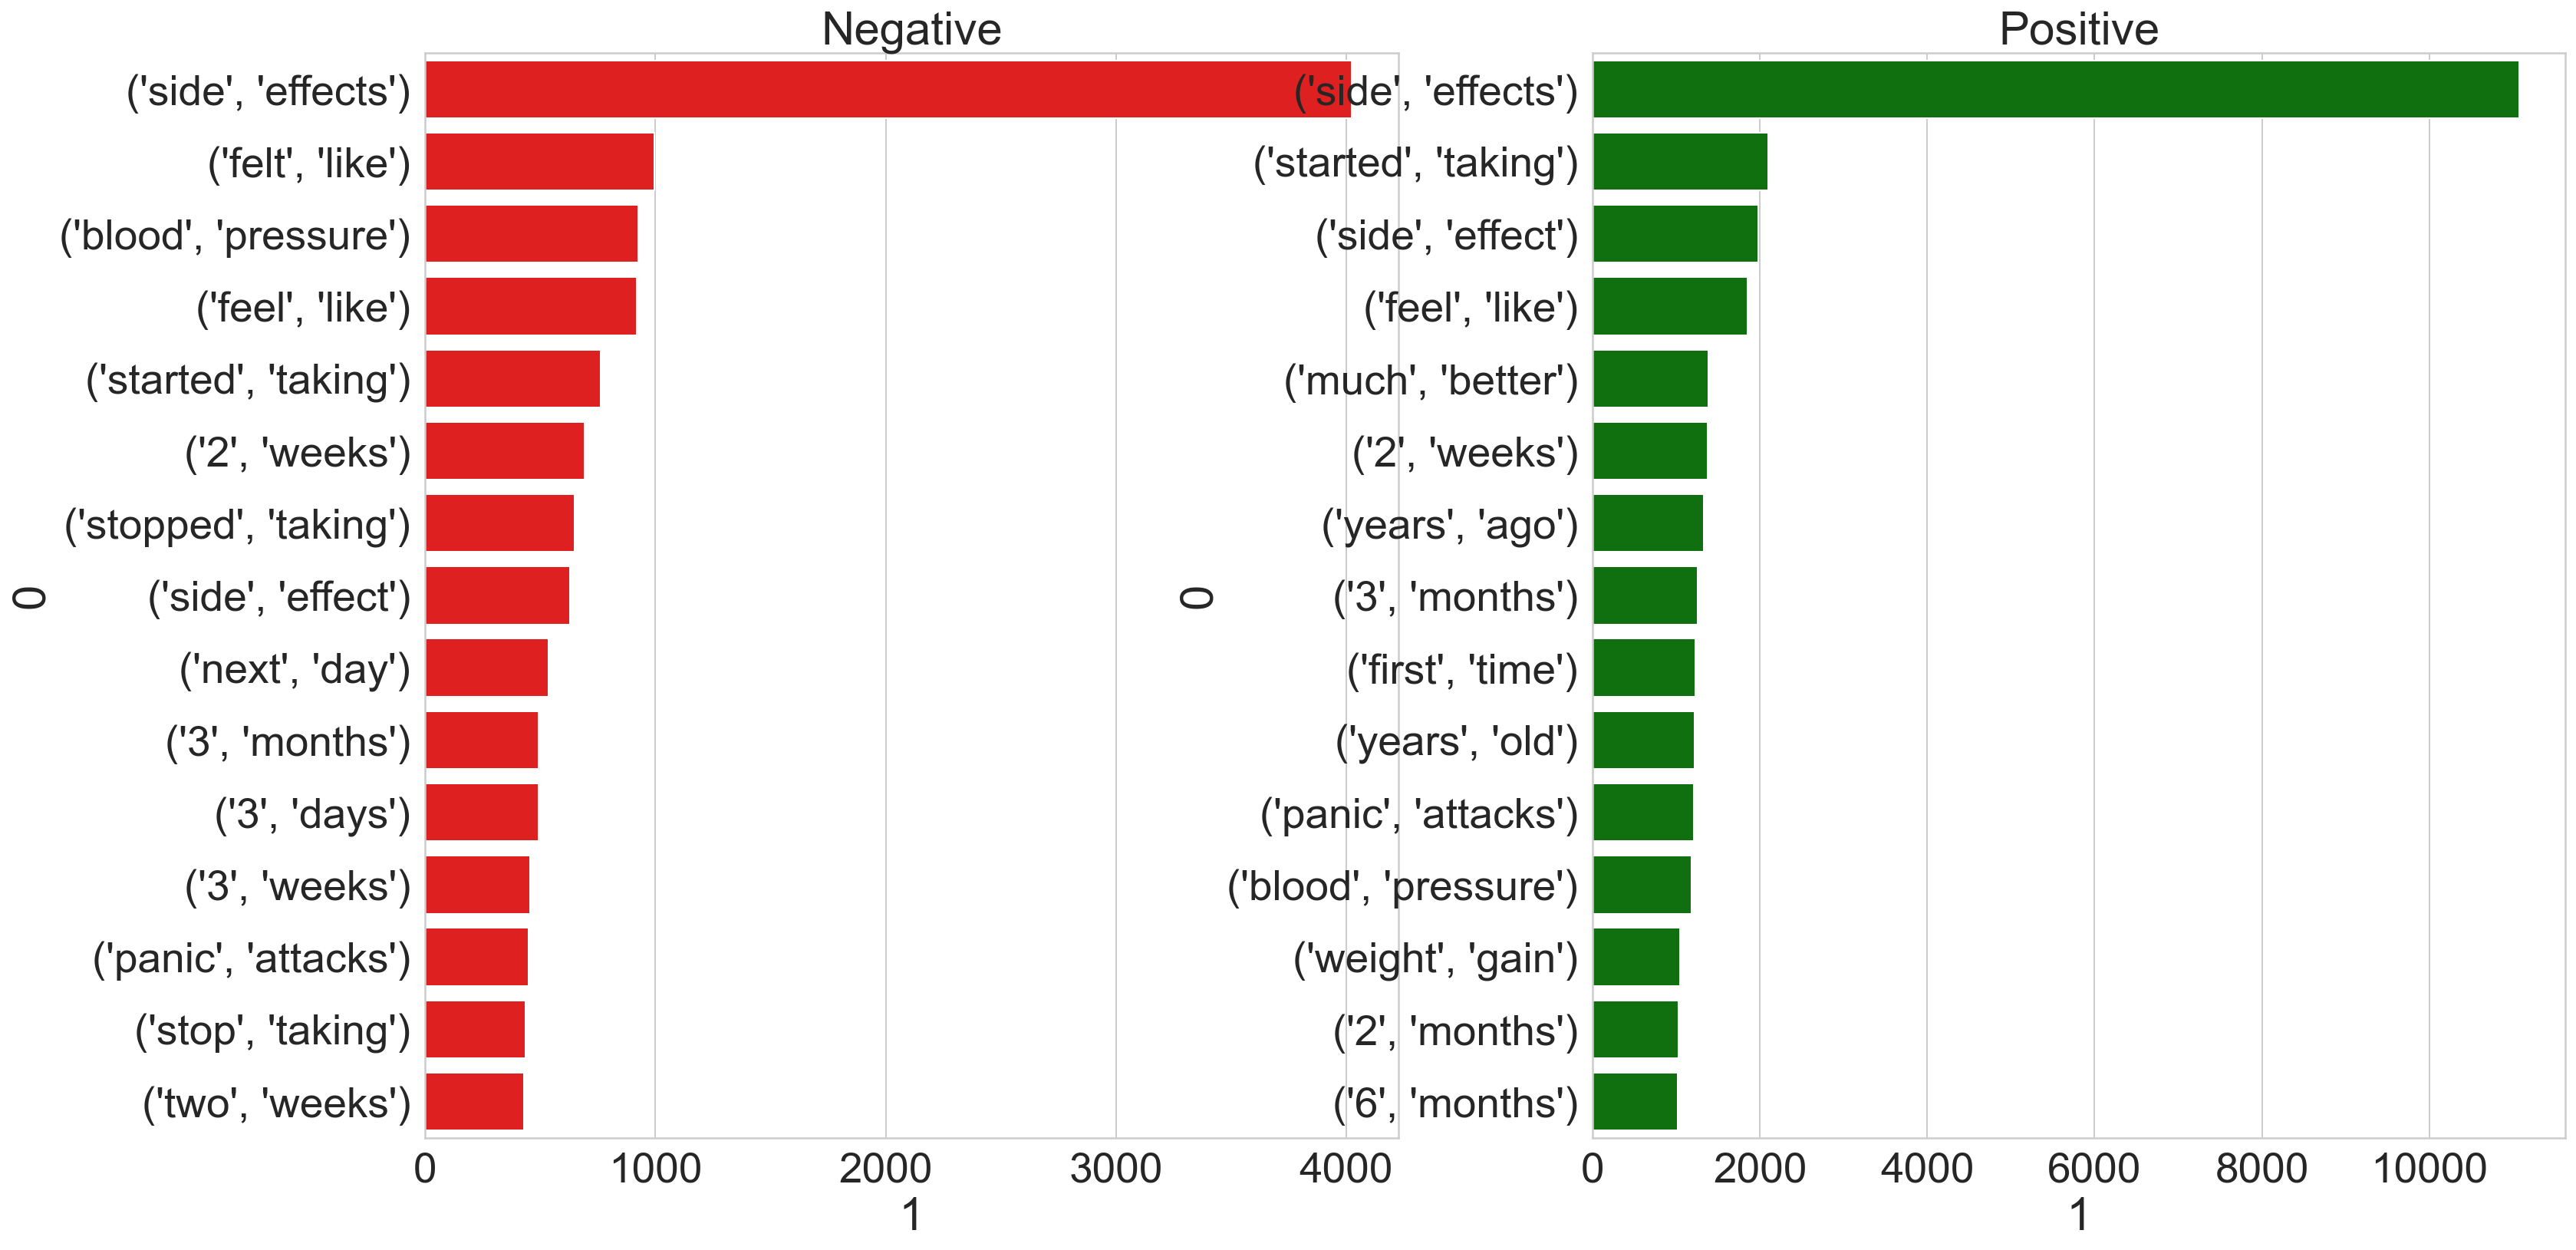

In [134]:
bigrams_0 = ngrams(token_review_0, 2)
bigrams_1 = ngrams(token_review_1, 2)

frequency_b0 = Counter(bigrams_0)
frequency_b1 = Counter(bigrams_1)

df_b0 = pd.DataFrame(frequency_b0.most_common(15))
df_b1 = pd.DataFrame(frequency_b1.most_common(15))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)

sns_b0 = sns.barplot(x = df_b0[1], y = df_b0[0], color = 'red', ax = ax[0])
sns_b1 = sns.barplot(x = df_b1[1], y = df_b1[0], color = 'green', ax = ax[1])

# Setting axes labels
sns_b0.set_title("Negative")
sns_b1.set_title("Positive")


In [249]:
common_drug_side_effects = pd.DataFrame(columns=['diarrhea', 'constipation', 'dizziness', 'drowsiness', 'fatigue', 'palpitations', 'nausea',
                           'vomitting', 'rash', 'upset stomach', 'hives', 'headache', 'weight gain', 'weight loss', 'dry', 
                           'suicidal', 'fever', 'swelling', 'alopecia', 'heartburn', 'burning', 'dryness', 'vomitting', 
                           'pain', 'anxiety', 'suicide', 'mood swings'])

In [250]:
df_side_effects = pd.concat([df,common_drug_side_effects],axis=1)

In [251]:
for side_effect in common_drug_side_effects:
    df_side_effects[side_effect] = df_side_effects['Review'].map(lambda x: 1 if side_effect in x else 0)

In [252]:
df_side_effects.drop_duplicates(inplace=True)

In [253]:
df_side_effects.dropna(inplace=True)

In [254]:
df_side_effects.head(3)

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,...,0,0,0,0,0,0,1,0,0,0
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,...,0,0,0,0,0,0,1,0,0,0
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,...,0,0,0,0,0,0,0,0,0,0


In [255]:
dum_side_effects = pd.get_dummies(df_side_effects, columns=['Drug', 'Condition', 'Month'], drop_first=True)

In [256]:
df_side_effects.drop(['review_clean'], axis=1, inplace=True)

In [257]:
df_side_effects.drop(['Rating'], axis=1, inplace=True)

In [258]:
df_side_effects.drop(['Review'], axis=1, inplace=True)

In [259]:
df_side_effects.drop(['Year'], axis=1, inplace=True)

In [260]:
df_side_effects.drop(['Review_length'], axis=1, inplace=True)

In [261]:
df_side_effects.drop(['Helpful'], axis=1, inplace=True)

In [262]:
df_side_effects.drop(['Drug'], axis=1, inplace=True)

In [263]:
df_side_effects.drop(['Condition'], axis=1, inplace=True)

In [264]:
df_side_effects.drop(['Month'], axis=1, inplace=True)

In [125]:
test_scores1 = []
cv_scores1 = []

In [265]:
df_side_effects

,Rating_Binary,diarrhea,constipation,dizziness,drowsiness,fatigue,palpitations,nausea,vomitting,rash,...,swelling,alopecia,heartburn,burning,dryness,vomitting,pain,anxiety,suicide,mood swings
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54609,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54610,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
X = df_side_effects
y = df_side_effects.pop('Rating_Binary')

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

model_1 = LogisticRegression(penalty = 'none')

params = {'C': np.logspace(-4, 4, 10),
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_1,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 0.0001, 'fit_intercept': True}
Best estimator C:
0.0001
Best estimator mean cross validated training score:
0.7145211878470038
Best estimator score on the full training set:
0.7098058963559788
Best estimator score on the test set:
0.7074063901858464
Best estimator coefficients:
[[-6.85449620e-02 -2.75827588e-02  3.73952863e-02 -1.10677687e-03
   1.65240666e-02  0.00000000e+00  9.65138050e-03  1.56071509e-01
   1.92353685e+00 -1.95193385e-01 -3.25815868e-01  2.04313334e-02
  -1.31221898e-01  2.62249677e-02 -1.47803970e-01 -6.44053947e-02
  -2.86804026e-01 -5.39795253e-04 -1.14244047e-01 -1.71680941e-02
  -6.93343468e-02 -3.13636166e-01  3.76970404e-03  9.38497660e-02
   3.41221903e-02 -9.61230420e-02 -5.46626603e-02 -8.01489814e-02
  -1.43251956e-03 -2.98329537e-02 -8.51549005e-02  3.07298350e-02
  -5.39795253e-04 -6.33233332e-01  1.67017024e-01 -3.30874872e-03
  -4.47145369e-02]]


In [129]:
test_scores1.append(gs.score(X_test, y_test))
cv_scores1.append(gs.best_score_)

In [130]:
model_1 = LogisticRegression(solver = 'liblinear', penalty = 'l1')

params = {'C': np.logspace(-4, 4, 10),
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_1,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 166.81005372000558, 'fit_intercept': False}
Best estimator C:
166.81005372000558
Best estimator mean cross validated training score:
0.7254166062711016
Best estimator score on the full training set:
0.7257828236586705
Best estimator score on the test set:
0.7259910281058317
Best estimator coefficients:
[[-1.52169025e-02  2.39215947e-03  2.05897485e-02 -2.45820481e-03
   7.65958015e-03  0.00000000e+00  3.87113289e-03  6.88701643e-02
   3.51003864e+00 -1.16967752e-02 -6.56383913e-01  2.74109214e-01
  -3.78908276e-01  2.45019554e-01 -5.20395033e-01 -8.27940686e-01
  -1.57445160e-01  2.10397188e-03 -4.45127917e-01 -2.21471517e-01
  -1.27988657e+00 -2.68688893e-01 -8.89233753e-02  3.35023920e-01
   6.26168546e-02 -4.94736154e-01 -4.91495818e-01 -7.76382555e-01
  -9.33706372e-01 -4.50211428e-01 -4.08856859e-01  4.47552161e-01
   6.92254511e-01 -2.65835706e-01  8.25719941e-02  4.86469445e-02
  -2.25703735e-01]]


In [131]:
test_scores1.append(gs.score(X_test, y_test))
cv_scores1.append(gs.best_score_)

In [132]:
model_1 = LogisticRegression(solver = 'liblinear', penalty = 'l2')

params = {'C': np.logspace(-4, 4, 10),
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_1,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 10000.0, 'fit_intercept': True}
Best estimator C:
10000.0
Best estimator mean cross validated training score:
0.7255768129023946
Best estimator score on the full training set:
0.7260117194652994
Best estimator score on the test set:
0.7258994781653392
Best estimator coefficients:
[[-1.58786604e-02 -2.80748496e-03  2.00501930e-02 -1.61549908e-03
   7.68666217e-03  0.00000000e+00  3.80530458e-03  2.78124259e-02
   3.45032560e+00 -1.28912003e-02 -6.26998231e-01  2.24356950e-01
  -3.52174648e-01  2.65492619e-01 -5.03684524e-01 -8.58102553e-01
  -1.67262272e-01  3.66688665e-02 -4.67108058e-01 -1.76888943e-01
  -1.04452930e+00 -2.71008030e-01 -7.50719104e-02  3.32044592e-01
   6.90867524e-02 -5.15300153e-01 -4.89398830e-01 -8.44877942e-01
  -4.49238671e-02 -3.55840914e-01 -4.49232651e-01  3.82396655e-01
   3.66688665e-02 -2.63905527e-01  8.03127436e-02  5.20925780e-02
  -2.39997228e-01]]


In [133]:
test_scores1.append(gs.score(X_test, y_test))
cv_scores1.append(gs.best_score_)

In [271]:
model_2 = RandomForestClassifier()

params = {'max_depth':range(1,20),
          'max_features':["auto","log2",0.5],
         'criterion':['gini','entropy'],
         'bootstrap':[True,False],
         }

gs = GridSearchCV(model_2,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator:')
print(gs.best_estimator_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))

Best Parameters:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2'}
Best estimator:
RandomForestClassifier(bootstrap=False, max_depth=16, max_features='log2')
Best estimator mean cross validated training score:
0.6944012427134656
Best estimator score on the full training set:
0.7037401574803149
Best estimator score on the test set:
0.6915682504806372


In [135]:
test_scores1.append(model_2_test)
cv_scores1.append(model_2_cv)

In [268]:
model_3 = DecisionTreeClassifier(max_depth=3, max_features=0.3)

params = {'max_depth':range(1,20),
          'max_features':["auto","log2",0.5],
         'criterion':['gini','entropy']
         }

gs = GridSearchCV(model_3,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator:')
print(gs.best_estimator_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))

Best Parameters:
{'criterion': 'gini', 'max_depth': 13, 'max_features': 0.5}
Best estimator:
DecisionTreeClassifier(max_depth=13, max_features=0.5)
Best estimator mean cross validated training score:
0.693554340800954
Best estimator score on the full training set:
0.6997344808643106
Best estimator score on the test set:
0.6903781012542342


In [141]:
test_scores0 = [0.7074063901858464,0.7259910281058317,0.7258994781653392,0.7337727730476975,0.7196740822118466]

In [142]:
cv_scores0 = [0.7145211878470038,0.7254166062711016,0.7255768129023946,0.7390358858505354,0.7242263265911493]

In [143]:
labels = ['LogisticRegression', 'LogisticRegression \nLasso' , 'LogisticRegression \nRidge',
         'RandomForestClassifier', 'DecisionTreeClassifier']

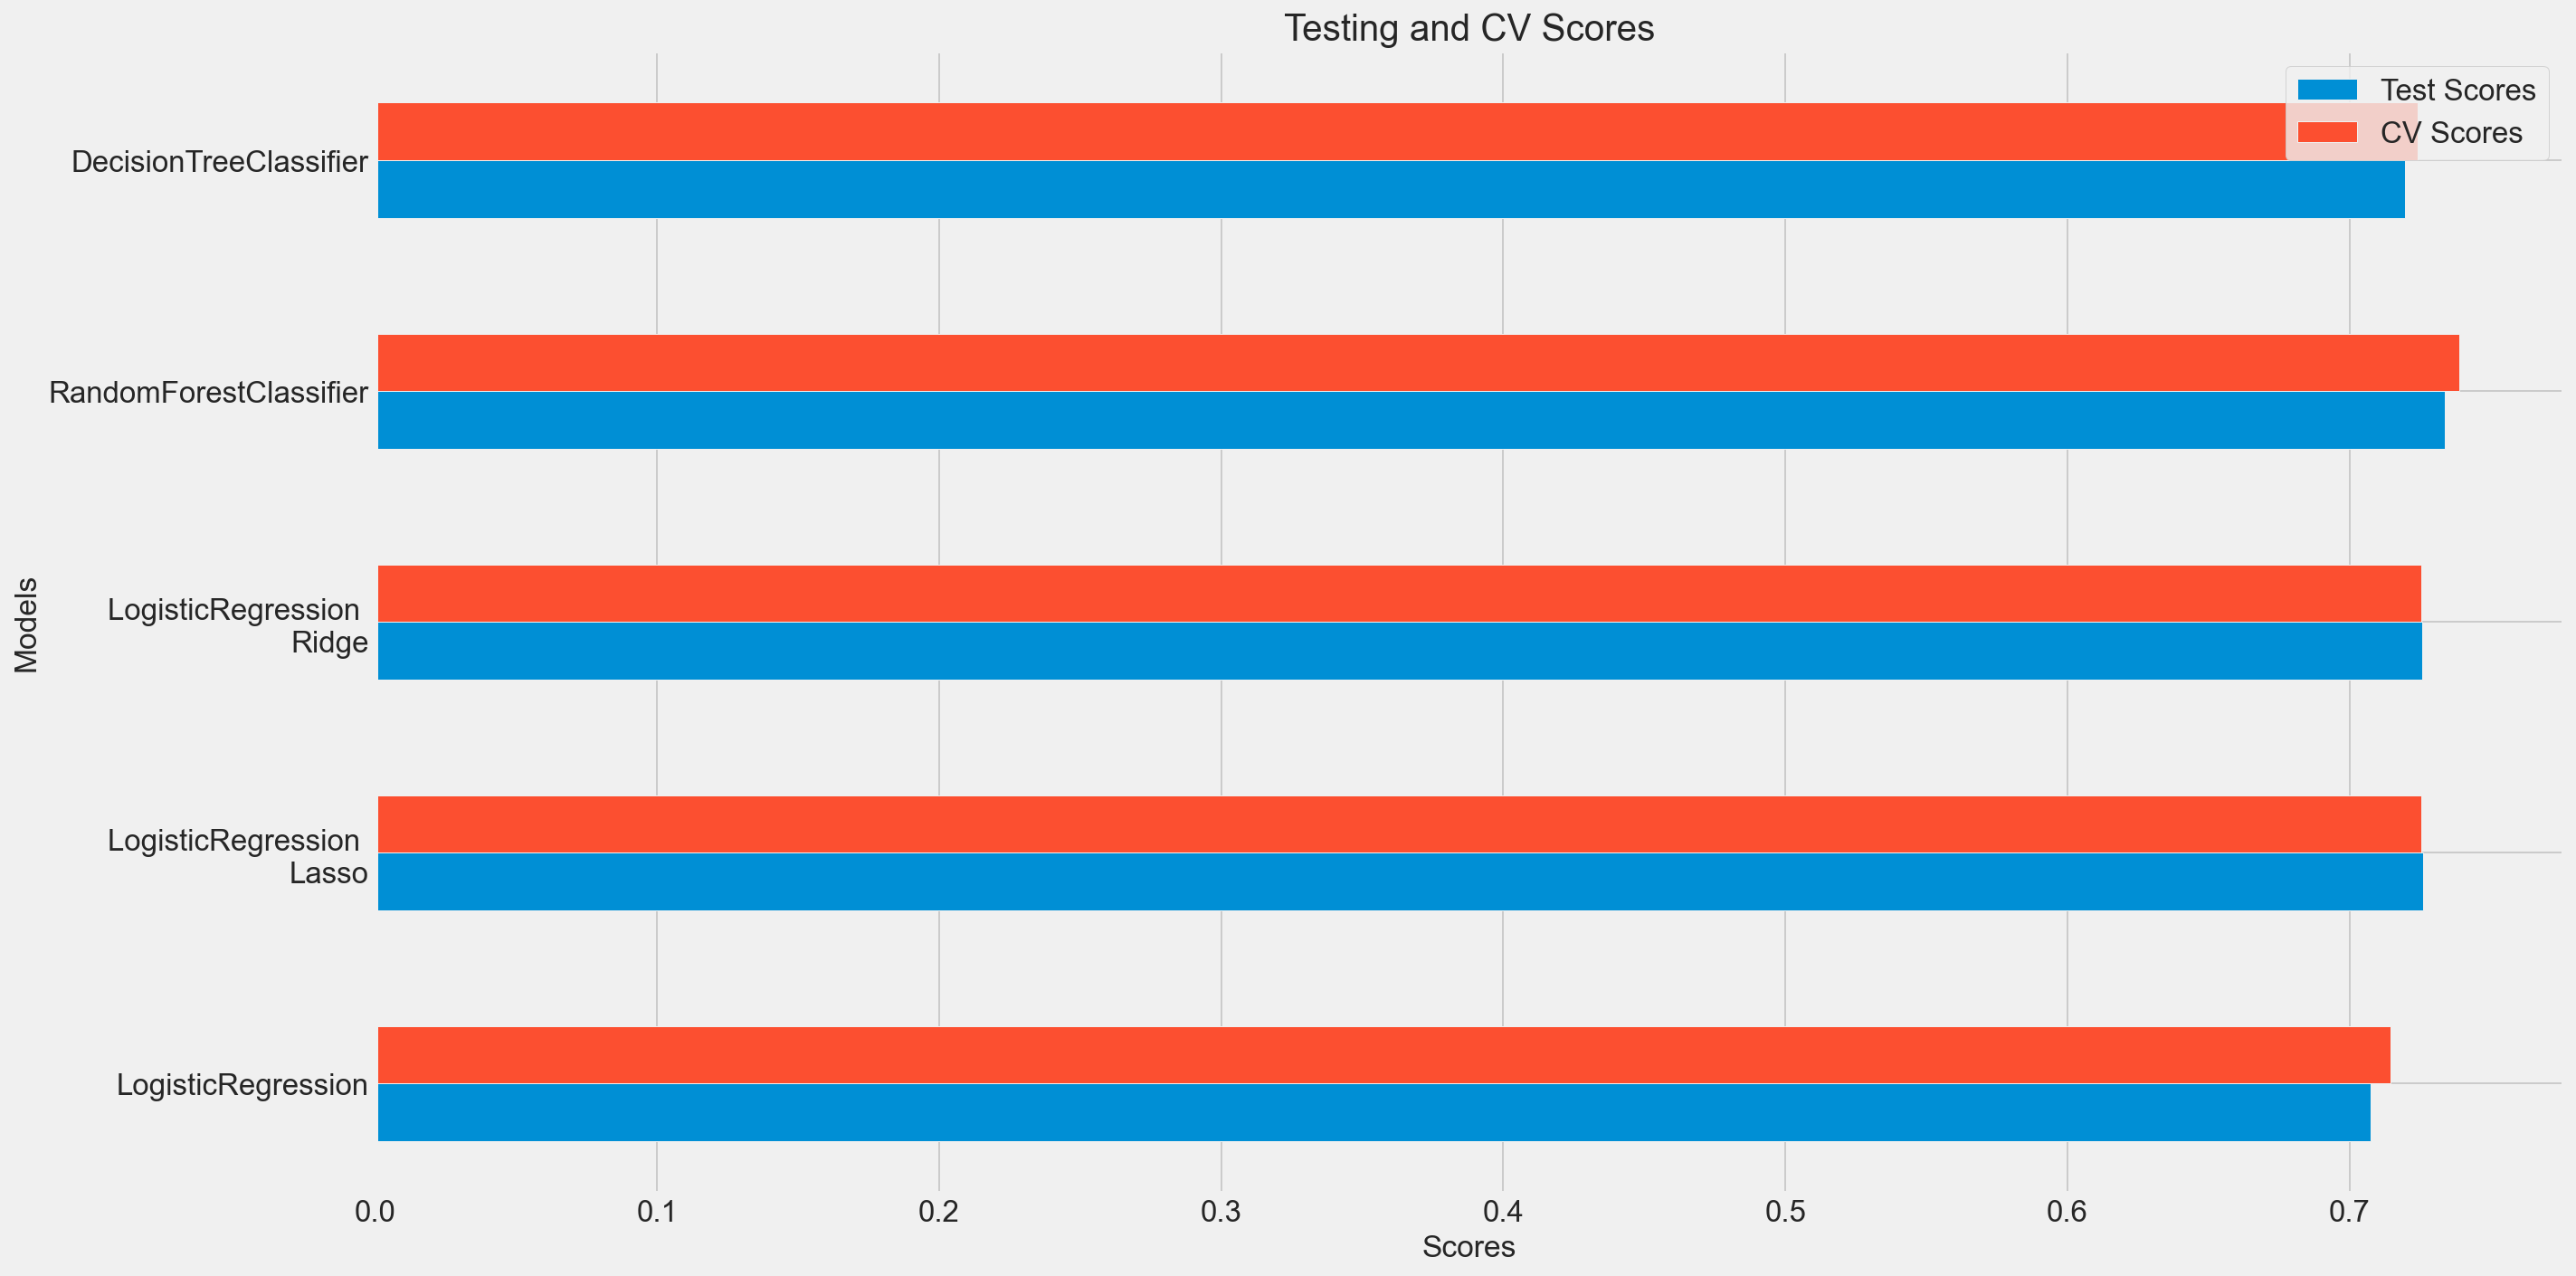

In [290]:
plt.style.use('fivethirtyeight')
x = np.arange(len(labels)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.barh(x - width/2, test_scores0, width, label='Test Scores')
rects2 = ax.barh(x + width/2, cv_scores0, width, label='CV Scores')

ax.set_ylabel('Models')
ax.set_xlabel('Scores')
ax.set_title('Testing and CV Scores')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [245]:
X_train.columns

Index(['Condition', 'Helpful', 'Predict_Sentiment', 'Month', 'Year',
       'count_sent', 'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

In [272]:
rf_df = pd.DataFrame()
rf_df['Features'] = X_train.columns
rf_df['Feature_Importances'] = gs.best_estimator_.feature_importances_

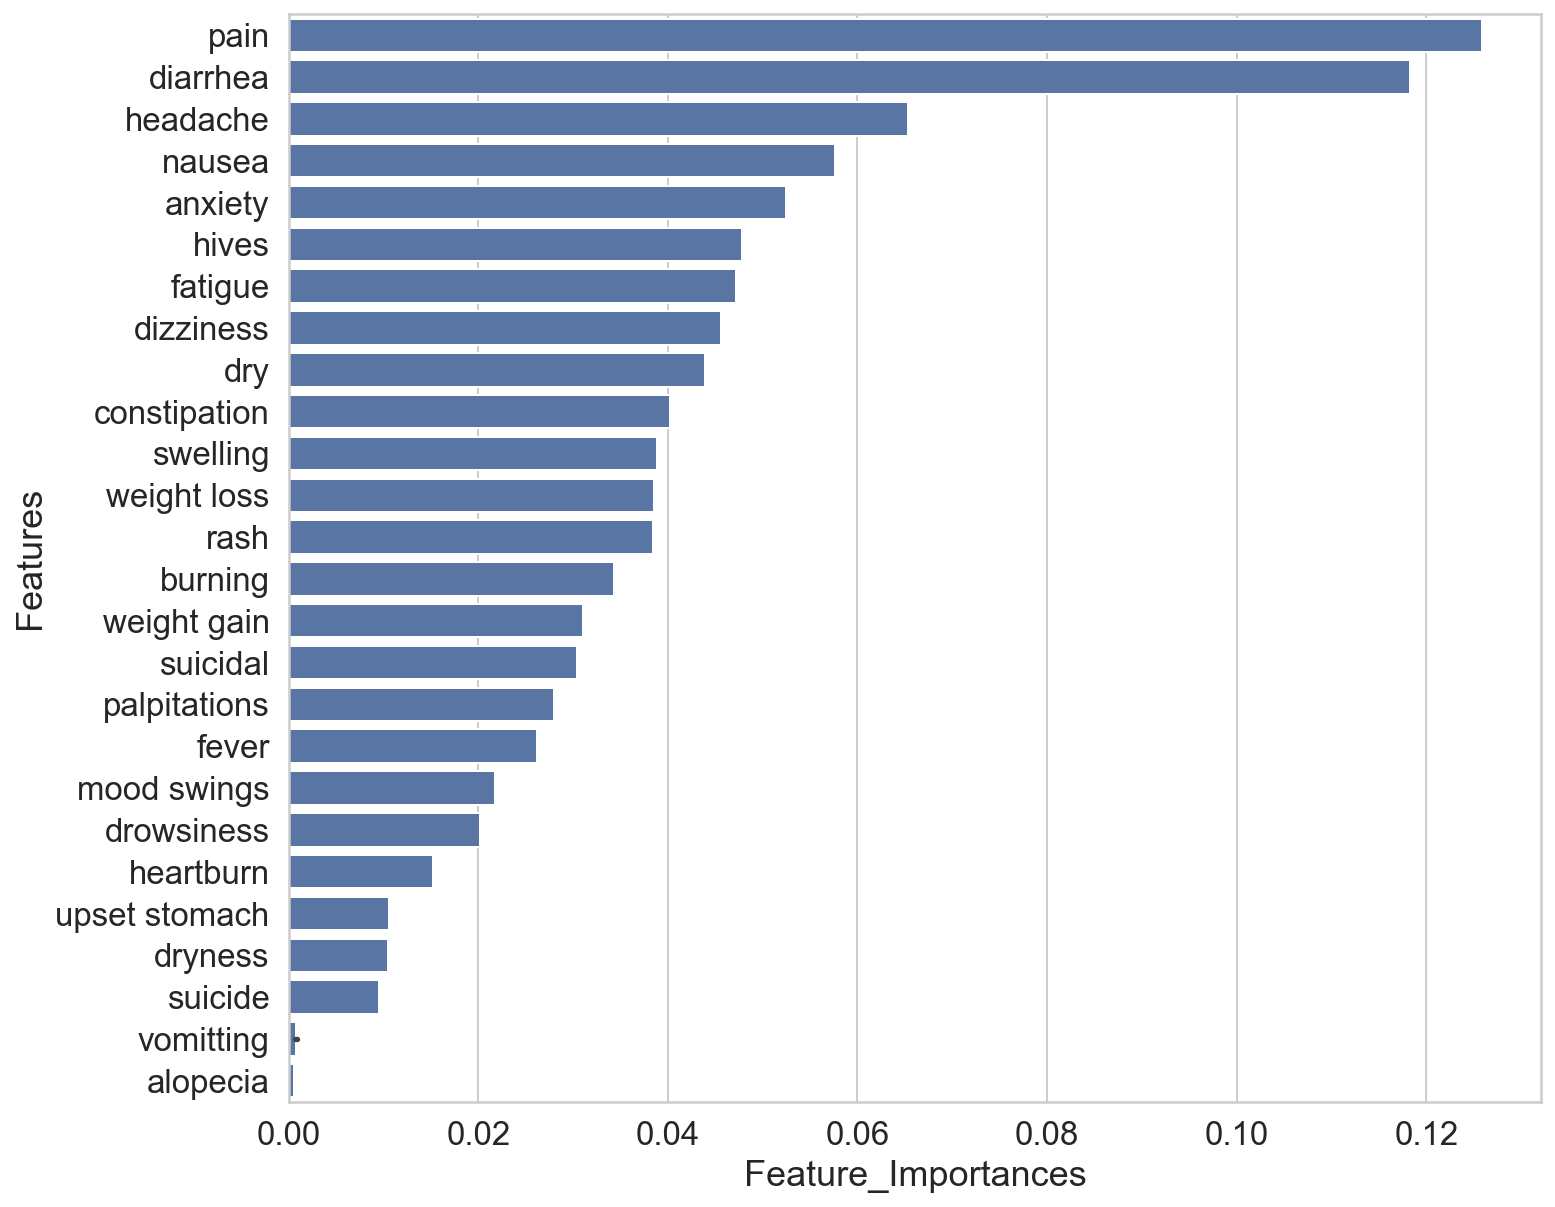

In [273]:
sorted_coeffcients = rf_df.sort_values(by='Feature_Importances',ascending=False)
fig,ax= plt.subplots(figsize=(10,10))
sns.barplot(y=sorted_coeffcients.Features,x=sorted_coeffcients.Feature_Importances, orient='h',ax=ax, color='b');
plt.show()

In [67]:
df.head()

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1


In [68]:
import regex as re

In [71]:
punctuation = punctuation + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&' + "'"
stops = set(stopwords.words('english'))

In [72]:
df['count_sent']=df["Review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

df['count_word']=df["review_clean"].apply(lambda x: len(str(x).split()))

df['count_unique_word']=df["review_clean"].apply(lambda x: len(set(str(x).split())))

df['count_letters']=df["review_clean"].apply(lambda x: len(str(x)))

df["count_punctuations"] = df["Review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

df["count_words_title"] = df["Review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

df["count_stopwords"] = df["Review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

df["mean_word_len"] = df["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [73]:
from textblob import TextBlob
from tqdm import tqdm
reviews = df['review_clean']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
df["Predict_Sentiment"] = Predict_Sentiment
df.head()

100%|██████████| 54611/54611 [00:19<00:00, 2825.82it/s]


,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_title,count_stopwords,mean_word_len,Predict_Sentiment
0,8.0,9,accutane (isotretinoin):“i would give this med...,isotretinoin,Acne,December,2019,390,accutane isotretinoin would give medicine 10/1...,1,1,32,30,238,7,0,36,6.468750,0.285417
1,8.0,18,accutane (isotretinoin):“i started getting acn...,isotretinoin,Acne,December,2019,951,accutane isotretinoin started getting acne 13 ...,1,1,92,73,608,29,0,77,5.619565,-0.007018
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,isotretinoin,Acne,December,2019,48,amazing big pimples clear face,1,2,5,5,30,0,0,3,5.200000,0.233333
3,9.0,16,accutane (isotretinoin):“previously i had a se...,isotretinoin,Acne,December,2019,995,accutane isotretinoin previously serious acne ...,1,1,96,75,646,18,0,90,5.739583,0.106291
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,isotretinoin,Acne,December,2019,1008,accutane isotretinoin back abdomen acne became...,1,1,97,82,716,24,0,75,6.391753,0.016667


In [74]:
m = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April':4,
         'May':5,
         'June':6,
         'July':7,
         'August':8,
         'September':9,
         'October':10,
         'November':11,
         'December':12
        }

In [76]:
df['Month'] = df['Month'].map(m)

In [77]:
df['season'] = df["Month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))

In [82]:
df.dropna(inplace=True)

In [83]:
df.shape

(54611, 20)

In [88]:
df.reset_index(drop=True, inplace=True)

In [94]:
df.drop(['index'],axis=1,inplace=True)

In [149]:
df.head()

,Rating,Helpful,Review,Drug,Condition,Month,Year,Review_length,review_clean,Rating_Binary,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_title,count_stopwords,mean_word_len,Predict_Sentiment,season
0,8.0,9,accutane (isotretinoin):“i would give this med...,131,1,12,2019,390,accutane isotretinoin would give medicine 10/1...,1,1,32,30,238,7,0,36,6.468750,0.285417,4
1,8.0,18,accutane (isotretinoin):“i started getting acn...,131,1,12,2019,951,accutane isotretinoin started getting acne 13 ...,1,1,92,73,608,29,0,77,5.619565,-0.007018,4
2,10.0,2,“its amazing for big pimples\r\nits clear my f...,131,1,12,2019,48,amazing big pimples clear face,1,2,5,5,30,0,0,3,5.200000,0.233333,4
3,9.0,16,accutane (isotretinoin):“previously i had a se...,131,1,12,2019,995,accutane isotretinoin previously serious acne ...,1,1,96,75,646,18,0,90,5.739583,0.106291,4
4,7.0,19,accutane (isotretinoin):“my back and abdomen a...,131,1,12,2019,1008,accutane isotretinoin back abdomen acne became...,1,1,97,82,716,24,0,75,6.391753,0.016667,4


In [90]:
from sklearn.preprocessing import LabelEncoder

In [99]:
label_encoder_feat = {}
for feature in ['Drug', 'Condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

In [100]:
df.dropna(inplace=True)

In [156]:
features = df[['Condition', 'Helpful', 'Predict_Sentiment', 'Month', 'Year','count_sent',
                   'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df['Rating_Binary']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 3)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (38227, 13)
The Test set size  (16384, 13)


In [160]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=features.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=features.columns)

In [165]:
test_scores3 = []
cv_scores3 = []

In [162]:
model_1 = LogisticRegression(penalty = 'none',max_iter=1000)

params = {'C': np.logspace(-15, 4, 10),
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_1,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

cv1 = gs.best_score_
test1 = gs.score(X_test, y_test)

print('Best Parameters:')
print(gs.best_params_)

Best Parameters:
{'C': 1e-15, 'fit_intercept': True}


In [166]:
test_scores3.append(test1)
cv_scores3.append(cv1)

In [167]:
model_2 = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter=1000)

params = {'C': np.logspace(-4, 4, 10),
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_2,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

cv2 = gs.best_score_
test2 = gs.score(X_test, y_test)

print('Best Parameters:')
print(gs.best_params_)

Best Parameters:
{'C': 0.3593813663804626, 'fit_intercept': True}


In [168]:
test_scores3.append(test2)
cv_scores3.append(cv2)

In [175]:
model_3 = LogisticRegression(solver = 'liblinear', penalty = 'l2', max_iter=1000)

params = {'C': np.logspace(-4, 4, 10),
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model_3,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

cv3 = gs.best_score_
test3 = gs.score(X_test, y_test)

print('Best Parameters:')
print(gs.best_params_)

Best Parameters:
{'C': 0.3593813663804626, 'fit_intercept': True}


In [176]:
test_scores3.append(test3)
cv_scores3.append(cv3)

In [179]:
model_4 = RandomForestClassifier()

params = {'max_depth':range(1,20),
          'max_features':["auto","log2",0.5],
         'criterion':['gini','entropy'],
         'bootstrap':[True,False],
         }

gs = GridSearchCV(model_4,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

cv4 = gs.best_score_
test4 = gs.score(X_test, y_test)

print('Best Parameters:')
print(gs.best_params_)

Best Parameters:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 19, 'max_features': 0.5}


In [180]:
test_scores3.append(test4)
cv_scores3.append(cv4)

In [181]:
model_5 = DecisionTreeClassifier(max_depth=3, max_features=0.3)

params = {'max_depth':range(1,20),
          'max_features':["auto","log2",0.5],
         'criterion':['gini','entropy']
         }

gs2 = GridSearchCV(model_5,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs2.fit(X_train, y_train)

# extract the grid search results

cv5 = gs2.best_score_
test5 = gs2.score(X_test, y_test)

print('Best Parameters:')
print(gs2.best_params_)

Best Parameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.5}


In [182]:
test_scores3.append(test5)
cv_scores3.append(cv5)

In [183]:
labels = ['LogisticRegression', 'LogisticRegression \nLasso' , 'LogisticRegression \nRidge',
         'RandomForestClassifier', 'DecisionTreeClassifier']

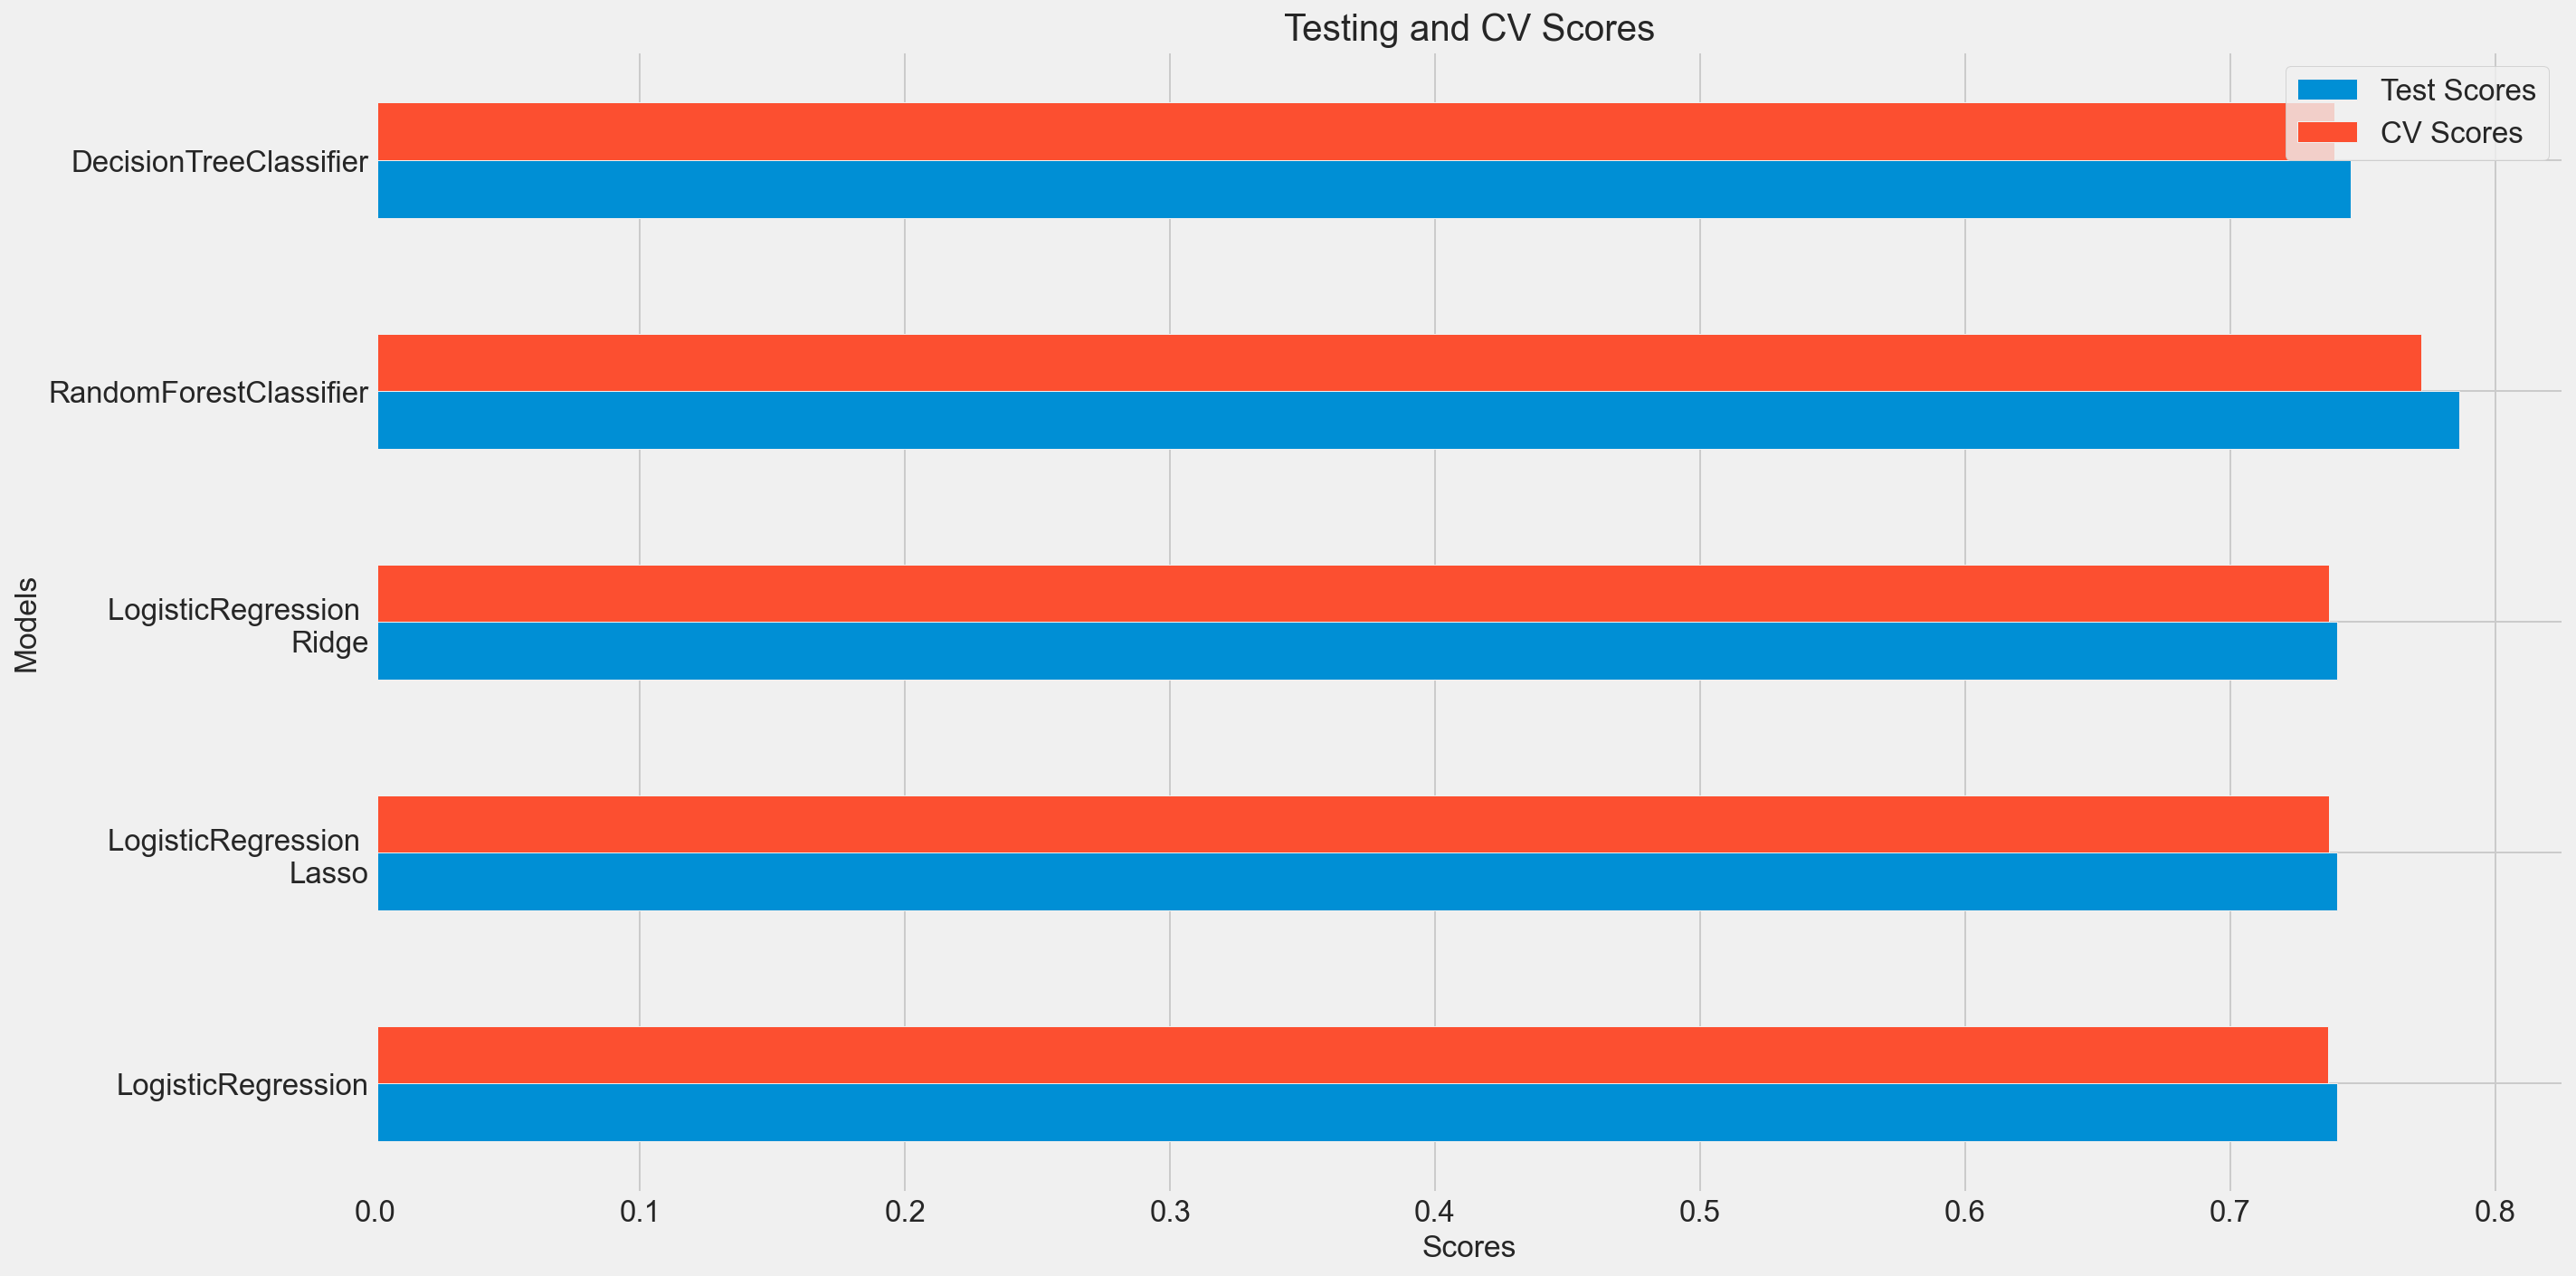

In [202]:
plt.style.use('fivethirtyeight')
x = np.arange(len(labels)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.barh(x - width/2, test_scores3, width, label='Test Scores')
rects2 = ax.barh(x + width/2, cv_scores3, width, label='CV Scores')

ax.set_ylabel('Models')
ax.set_xlabel('Scores')
ax.set_title('Testing and CV Scores')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [192]:
test_scores3

[0.740478515625,
 0.7403564453125,
 0.74041748046875,
 0.78662109375,
 0.745361328125]

In [193]:
cv_scores3

[0.7370705723011062,
 0.7372275376379276,
 0.7372798457308155,
 0.7720459947168417,
 0.739451014795136]

In [196]:
rf_df = pd.DataFrame()
rf_df['Features'] = X_train.columns
rf_df['Feature_Importances'] = gs.best_estimator_.feature_importances_

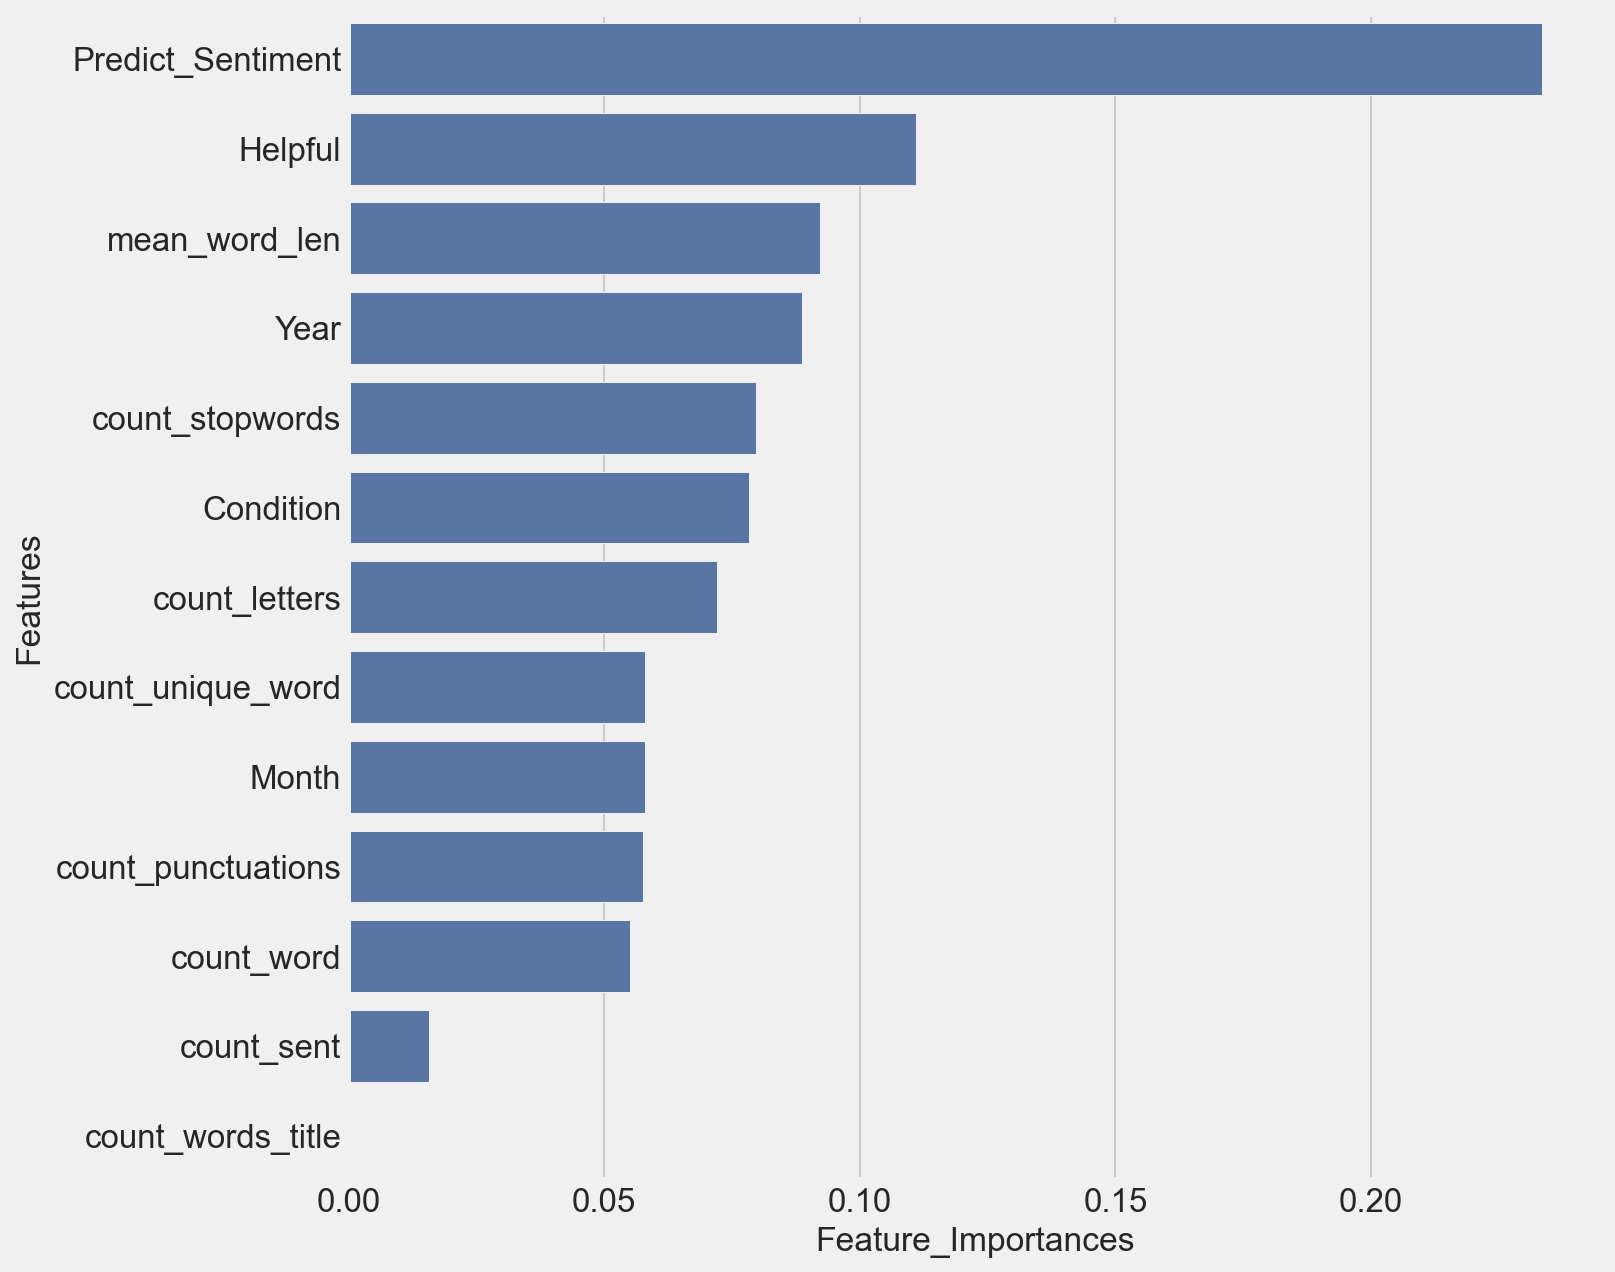

In [201]:
sorted_coeffcients = rf_df.sort_values(by='Feature_Importances',ascending=False)
fig,ax= plt.subplots(figsize=(10,10))
sns.barplot(y=sorted_coeffcients.Features,x=sorted_coeffcients.Feature_Importances, orient='h',ax=ax, color='b');
plt.show()